**explorative data analysis**
<a id="intro"></a><br>
This notebook should give some introductiory samples to the explorative data analysis topic:

(please note that a link only works if the specific cell has been run before)

- introduction of the scikit-learn iris-dataset [->](#iris)
- scatter plot of 'sepal length' vs 'sepal width' in relation to their classes [->](#scat1)
- correlation matrix of the features [->](#corrMat)
- box-plot of features [->](#boxplot)
- andrew's curves plot [->](#ac)
- parallel coordinates plot [->](#parallelCoordinates)
- 'RadViz' plot [->](#radviz)


<a id="iris">**Iris Dataset**</a><br>
In this notebook the iris-dataset is used for demonstrating different kinds of data visualizations.

"The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus". Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.", wikipedia [link](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In scikit-learn the dataset is an object of the [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch) class which is a container exposing keys of attributes.<br>
Detailled description of the iris data set on scikit-

In [24]:
# load iris dataset and load it into a pands dataframe
#
from sklearn.datasets import load_iris
import pandas as pd
#
# - load the dataframe manually:
# load numeric data into frame:
skBunch_iris = load_iris()
df_man = pd.DataFrame(skBunch_iris['data'], columns=skBunch_iris['feature_names'])
#
# add the iris-class names
targets = skBunch_iris['target']
target_names = skBunch_iris['target_names']
#
df_man['class'] = target_names[targets]

In [25]:
# Return a tuple representing the dimensionality of the DataFrame.
df_man.shape
# 

(150, 5)

In [26]:
#Return the first n rows. default: n=5
df_man.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# Generate descriptive statistics
df_man.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<a id="scat1">**Plot 2 features in relation to their class**</a>

Plot a simple scatter plot of 2 features of the iris dataset.<br>
[scikit-learn example](http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html)

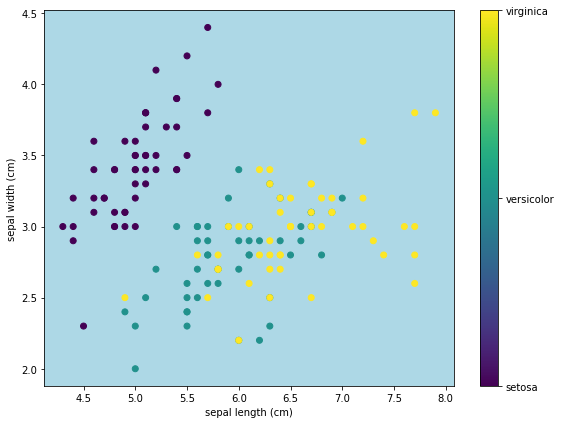

In [28]:
#
# plot data in a scatter-plot
#
# code is based on the scikit-learn example:
# http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html
#
import matplotlib.pyplot as plt
#
#
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: skBunch_iris.target_names[int(i)])

plt.figure(figsize=(8, 6))
plt.scatter(df_man['sepal length (cm)'], df_man['sepal width (cm)'], c=targets)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
# set background color
plt.gca().set_facecolor('lightblue')
plt.tight_layout()
plt.show()

<a id="corrMat">**correlation matrix**</a><br>

Compute pairwise correlation of iris features with the Data Frame method 'corr()'.<br>
more information about the pandas function: [pandas api](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

[back to top](#intro)

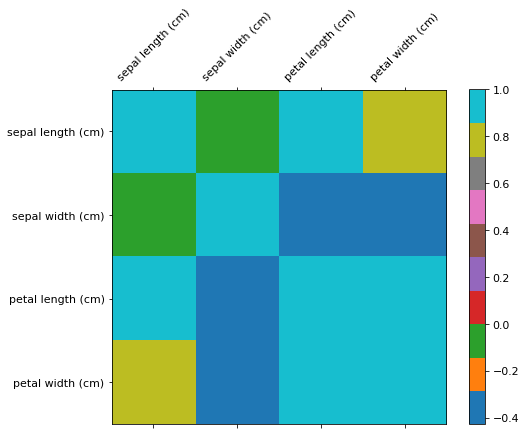

In [29]:
# correlation matrix of feature_names
#
# 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
#
# load dataset
data = load_iris()
#
# create dataframe without class-column
df_features = pd.DataFrame(data['data'], columns=data['feature_names'])
#
f = plt.figure(figsize=(8, 6))
#
# create correlation matrix
corr_Matrix = df_features.corr()
#
# with matshow() the correlation matrix can be visualized
# matshow() displays an array as a matrix. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html
#
plt.matshow(corr_Matrix, fignum=f.number, cmap=plt.get_cmap('tab10'))
#
# label the x and y axis with the features names
plt.xticks(range(df_features.shape[1]), df_features.columns, fontsize=11, rotation=45)
plt.yticks(range(df_features.shape[1]), df_features.columns, fontsize=11)
# add colorbar and set font size equal to label font size
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)

plt.show()

<a id="boxplot">**Boxplot of each of the features**</a>

The data frame method 'plot()' can also create a boxplot of all the numeric data in the data frame. Here all iris features are displayed in a boxplot.<br>
more information about the plot function: 
[pandas api](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.boxplot.html)

[back to top](#intro)

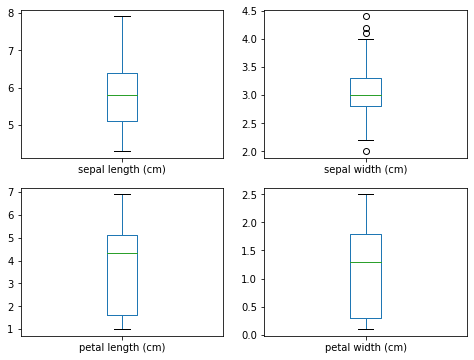

In [30]:
# box plot of each of the features
#
# plot a boxplot for each feature in the data frame
# -sharex, sharey: False  -> each diagram has its own axis 
df_man.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(8, 6))
plt.show()

<a id="ac">**Andrews curves**</a>

Display the iris features in a Andrews curves plot. Here, also a data frame method can be used to display this diagram.<br>
mor info :
[pandas plotting-tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools)

[back to top](#intro)

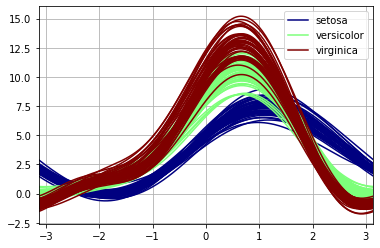

In [31]:
#
from pandas.plotting import andrews_curves
#
andrews_curves(df_man, 'class', colormap='jet')
#

<a id="parallelCoordinates">**Parallel coordinates**</a>

Display the iris features in a parallel coordinates plot. Here, also a data frame method can be used to display this diagram.<br>
mor info :
[pandas plotting-tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools)

[back to top](#intro)

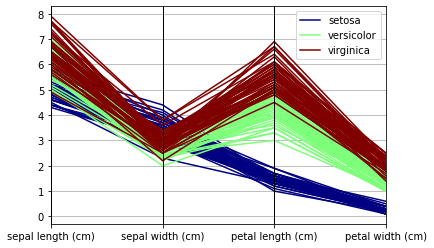

In [32]:
#
from pandas.plotting import parallel_coordinates
#
parallel_coordinates(df_man, 'class', colormap='jet')
#

<a id="radviz">**RadViz-plot**</a>

Display the iris features in a RidViz plot. Here, also a data frame method can be used to display this diagram.<br>
mor info :
[pandas plotting-tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools)

[back to top](#intro)

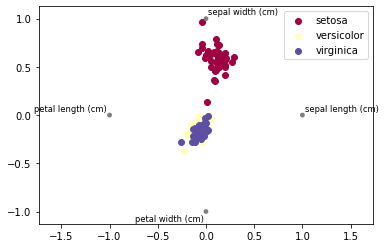

In [33]:
#
from pandas.plotting import radviz
#
radviz(df_man, 'class', colormap='Spectral')

Copyright © 2020 IUBH Internationale Hochschule